In [8]:
from Bio import Phylo

location = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias"

tree = Phylo.read(f"{location}/tree_tree.nwk", "newick")

tips = [term.name for term in tree.get_terminals()]
print(len(tips))

89


In [10]:
output = "Species,State"

diapause_foreground = ["Anthocharis_cardamines","Aporia_crataegi","Argynnis_bischoffii_washingtonia","Aricia_agestis","Aricia_artaxerxes","Battus_philenor","Boloria_euphrosyne","Boloria_selene","Brenthis_daphne","Brenthis_hecate","Brenthis_ino","Calycopis_cecrops","Celastrina_argiolus","Coenonympha_glycerion","Colias_nastes","Colias_palaeno","Cyaniris_semiargus","Danaus_plexippus","Erebia_aethiops","Erebia_ligea","Euphydryas_editha","Fabriciana_adippe","Glaucopsyche_alexis","Hipparchia_semele","Lasiommata_megera","Leptidea_juvernica","Leptidea_reali","Leptidea_sinapis","Lysandra_bellargus","Lysandra_coridon","Maniola_hyperantus","Maniola_jurtina","Melanargia_galathea","Melitaea_cinxia","Mellicta_athalia","Nymphalis_c-album","Nymphalis_io","Nymphalis_polychloros","Nymphalis_urticae","Oeneis_ivallda","Papilio_glaucus","Papilio_machaon","Papilio_xuthus","Pararge_aegeria","Parnassius_glacialis","Phengaris_arion","Pieris_brassicae","Pieris_mannii","Pieris_melete","Pieris_napi","Pieris_rapae","Plebejus_argus","Polyommatus_icarus","Polyommatus_iphigenia"]

for species in tips:
    if species in diapause_foreground:
        output += f"\n{species},diapause"
    else:
        output += f"\n{species},no_diapause"

with open(f"{location}/two_state_species.csv", 'w') as out_file:
          out_file.write(output)

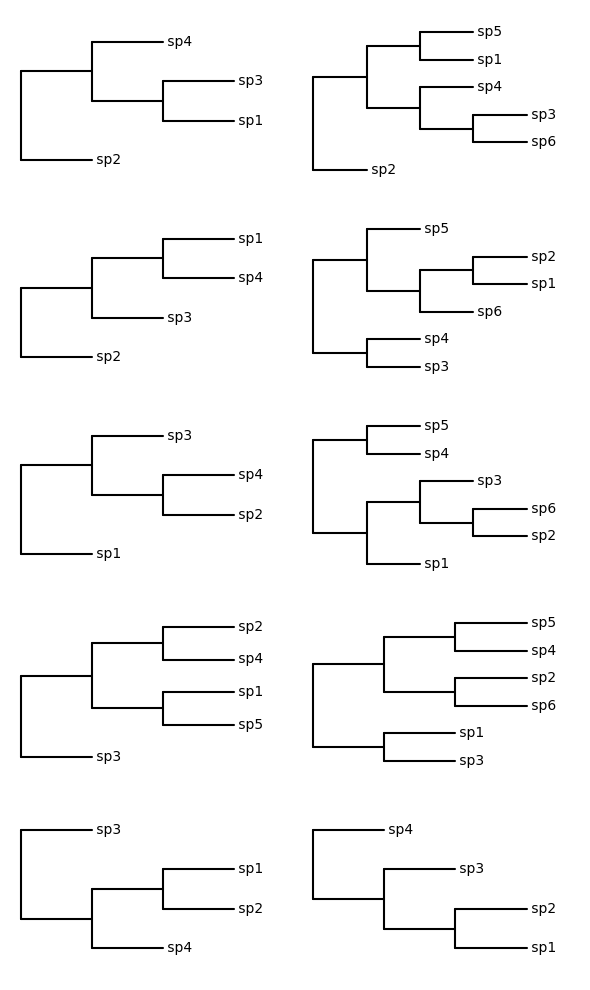

In [12]:
import matplotlib.pyplot as plt
from Bio import Phylo
from io import StringIO
import random

# --- Function to generate a random Newick tree ---
def random_newick(num_taxa):
    taxa = [f"sp{i}" for i in range(1, num_taxa + 1)]
    while len(taxa) > 1:
        a = random.choice(taxa)
        taxa.remove(a)
        b = random.choice(taxa)
        taxa.remove(b)
        new = f"({a},{b})"
        taxa.append(new)
    return taxa[0] + ";"

# --- Generate 10 random trees with 4–6 species each ---
trees = [Phylo.read(StringIO(random_newick(random.randint(4, 6))), "newick") for _ in range(10)]

# --- Create figure ---
fig, axes = plt.subplots(5, 2, figsize=(6, 10))
axes = axes.flatten()

for ax, tree in zip(axes, trees):
    Phylo.draw(tree, axes=ax, do_show=False, show_confidence=False)
    ax.axis("off")

# Turn off unused subplots (if any)
for ax in axes[len(trees):]:
    ax.axis("off")

# Add title
# fig.suptitle("Gene tree forest\nn=10 gene trees", fontsize=16, fontweight="bold", y=0.92)

plt.tight_layout()
plt.show()